In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PÁISES

In [20]:
paises = pd.read_csv('EGOV_DATA_2024.csv')['Country Name'].sort_values(ascending=True).tolist()

TIC

In [21]:
tic = pd.read_excel('ict_in_government.xlsx')

In [22]:
tic = tic[tic['Year'] == 2024]

In [23]:
tic['Soma das Respostas Positivas'] = tic['Indicator_1'] +tic['Indicator_2'] + tic['Indicator_3'] 

In [24]:
tic = tic[tic['Country'].isin(paises)]

In [25]:
tic['Country'] = tic['Country'].sort_values(ascending=True)

In [26]:
tic = tic.iloc[:, [0,1,5]].reset_index(drop=True)

PAÍSES

In [27]:
paises = tic['Country'].unique().tolist()

ÍNDICE DE DEMOCRACIA ELEITORAL

In [28]:
ide = pd.read_csv('updated_electoral_democracy_index.csv')

In [29]:
ide = ide[ide['Year'] == 2024]

In [30]:
ide = ide.iloc[:, [0, 3]]

In [31]:
ide = ide[ide['Entity'].isin(paises)].reset_index(drop=True)

In [32]:
paises = ide['Entity'].unique().tolist()

In [33]:
tic = tic[tic['Country'].isin(paises)]

DISPERSÃO

In [34]:
dispersao  = pd.DataFrame()
dispersao['Soma das Respostas Positivas'] = tic['Soma das Respostas Positivas']
dispersao['Electoral democracy index (central estimate)'] = ide['Electoral democracy index (central estimate)']

In [35]:
dispersao = dispersao.rename(columns={
    'Electoral democracy index (central estimate)': 'Índice de Democracia Eleitoral'
})

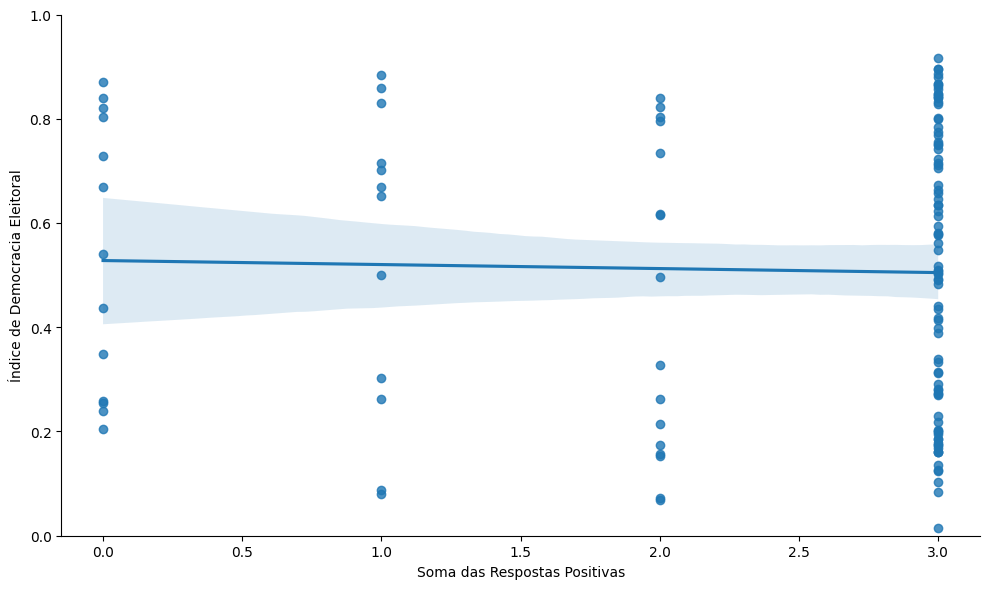

In [36]:
plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x='Soma das Respostas Positivas', y='Índice de Democracia Eleitoral')

sns.despine()
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/ict_in_government/dispersao_ticegov_indicedemocracia.png', dpi=300, bbox_inches='tight')
plt.show()